# Import

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the dataset
train = pd.read_csv(r'C:\Users\SONU KUMAR JHA\Documents\R\Datasets\titanic\train.csv')

In [3]:
df = train.copy()

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [6]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
the Countess      1
Lady              1
Jonkheer          1
Sir               1
Capt              1
Mme               1
Don               1
Ms                1
Name: Title, dtype: int64

In [7]:
stat_min= 10
title_names = (df['Title'].value_counts() < stat_min)

In [8]:
df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(df['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [9]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Title            0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked,Title
count,891,891,891,204,889,891
unique,891,2,681,147,3,5
top,"Sivic, Mr. Husein",male,347082,B96 B98,S,Mr
freq,1,577,7,4,644,517


In [13]:
df['Family_size'] = df['SibSp'] + df['Parch']

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [15]:
drop_column = ['Cabin','Ticket','PassengerId','Name','SibSp','Parch']
df.drop(drop_column, axis=1, inplace = True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0


In [17]:
# categorical_vars = ['Sex','Cabin','Embarked']

# for var in categorical_vars:
#     X[var].fillna('Missing',inplace=True)
#     dummies = pd.get_dummies(X[var],prefix=var)
#     X = pd.concat([X,dummies],axis=1)
#     X.drop([var],axis=1,inplace=True)

In [18]:
df.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Title           object
Family_size      int64
dtype: object

In [19]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [20]:
colname = []
for x in df.columns:
    if df[x].dtype == 'object':
        colname.append(x)
colname

['Sex', 'Embarked', 'Title']

In [21]:
from sklearn import preprocessing
le = {}
for x in colname:
    le[x] = preprocessing.LabelEncoder()
for x in colname:
    df[x] = le[x].fit_transform(df[x])

In [22]:
# Dependent and independent varibale
X = df.copy()
y = X.pop('Survived')

In [23]:
# Training and test set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=.3)

In [24]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,random_state=42,oob_score=True,n_estimators=100)
m.fit(X_train,y_train),m.oob_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False),
 0.8250401284109149)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[133  32]
 [ 31  72]]
             precision    recall  f1-score   support

          0       0.81      0.81      0.81       165
          1       0.69      0.70      0.70       103

avg / total       0.77      0.76      0.77       268

0.7649253731343284


# Selection of optimal number of trees

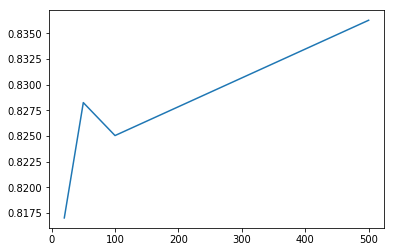

In [27]:
results = []
trees = [20,50,100,500]
for tree in trees:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=tree,oob_score=True,random_state=42)
    m.fit(X_train,y_train)
    res = m.oob_score_
    results.append(res)
    
pd.Series(results,trees).plot()

# Selection of optimal number of max_features

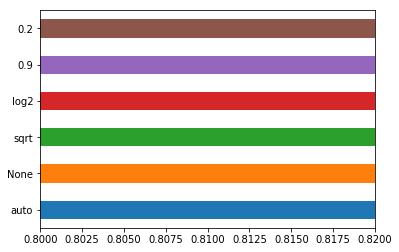

In [28]:
results = []
max_feature_options = ['auto',None,'sqrt','log2',.9,.2]
for max_features in max_feature_options:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=100,oob_score=True,random_state=42)
    m.fit(X_train,y_train)
    res = m.oob_score_
    results.append(res)
    
pd.Series(results,max_feature_options).plot(kind = 'barh',xlim=(.8,.82))

# Selection of optimal number of min_sample_leaf

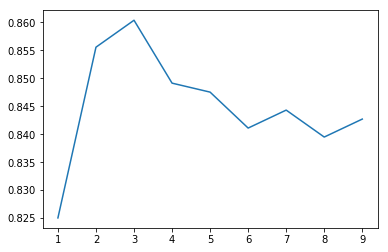

In [29]:
results = []
min_samples = [1,2,3,4,5,6,7,8,9]
for min_sample in min_samples:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=100,oob_score=True,random_state=42,min_samples_leaf=min_sample)
    m.fit(X_train,y_train)
    roc = m.oob_score_
    results.append(roc)

pd.Series(results,min_samples).plot()

# Final tree after tuning

In [30]:
m = RandomForestClassifier(n_jobs=-1,n_estimators=100,oob_score=True,random_state=42,min_samples_leaf=4)
m.fit(X_train,y_train)
m.oob_score_

0.8491171749598716

In [31]:
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[144  21]
 [ 32  71]]
             precision    recall  f1-score   support

          0       0.82      0.87      0.84       165
          1       0.77      0.69      0.73       103

avg / total       0.80      0.80      0.80       268

0.8022388059701493


# Model Evaluation

In [32]:
%time preds = np.stack([t.predict(X) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 75 ms


(0.0, 0.0)

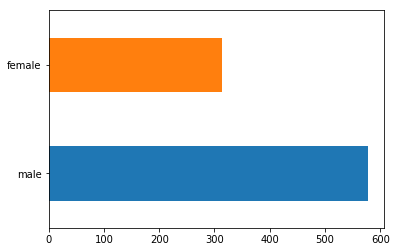

In [33]:
x = train.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Sex.value_counts().plot.barh()

In [34]:
flds = ['Sex','Survived','pred','pred_std']
enc_summ = x[flds].groupby('Sex', as_index=False).mean()
enc_summ

,Sex,Survived,pred,pred_std
0,female,0.742038,0.777803,0.284324
1,male,0.188908,0.110503,0.203453


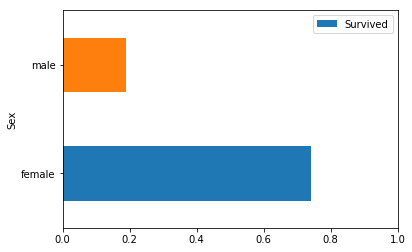

In [35]:
enc_summ = enc_summ[~pd.isnull(enc_summ.Survived)]
enc_summ.plot('Sex', 'Survived', 'barh', xlim=(0,1))

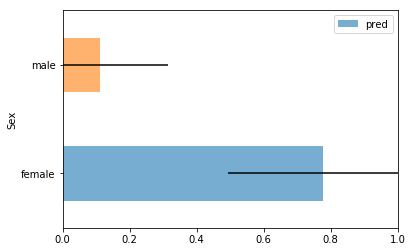

In [36]:
enc_summ.plot('Sex', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,1));

# Feature Importance

In [37]:
def rf_feat_importance(m,df):
    return pd.DataFrame({'cols':df.columns,
                       'imp':m.feature_importances_}).sort_values(by='imp',ascending=False)

In [38]:
fi = rf_feat_importance(m, X);fi[:10]

,cols,imp
1,Sex,0.336190
3,Fare,0.195264
5,Title,0.152964
2,Age,0.126663
0,Pclass,0.092621
6,Family_size,0.067937
4,Embarked,0.028361


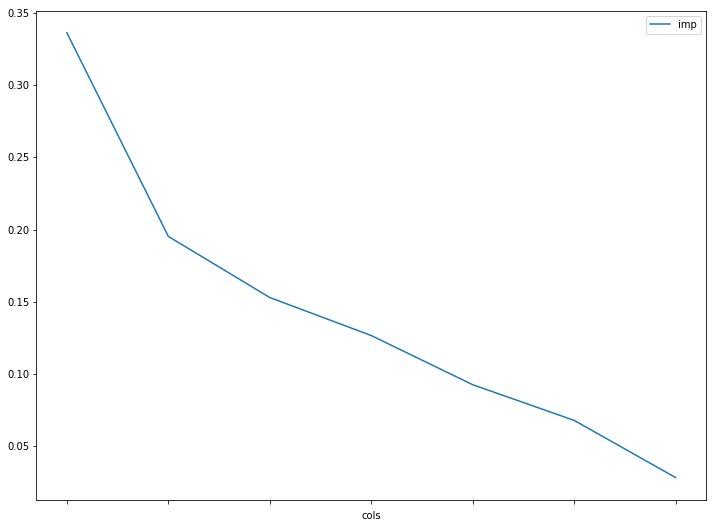

In [39]:
fi.plot('cols','imp',figsize=(12,9))

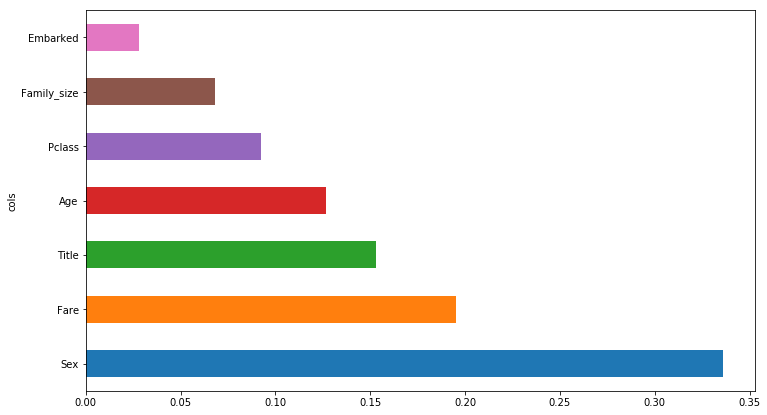

In [40]:
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30])

In [41]:
to_keep = fi[fi.imp>.005].cols;
X_keep = X[to_keep]
len(to_keep)

7

In [42]:
m = RandomForestClassifier(n_jobs=-1,n_estimators=100,oob_score=True,random_state=42,min_samples_leaf=2)
m.fit(X_keep,y)
m.oob_score_

0.8249158249158249

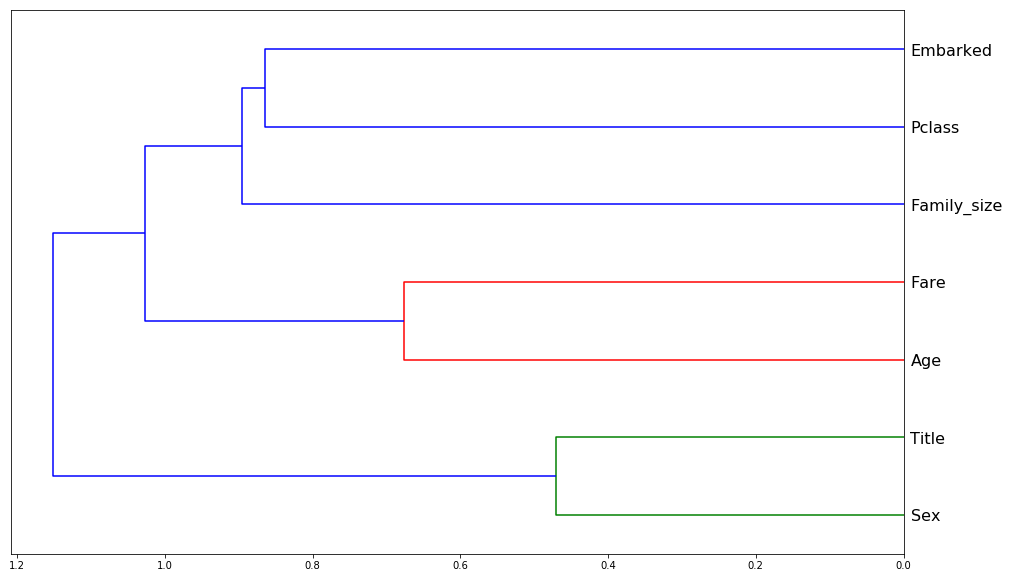

In [43]:
from scipy.cluster import hierarchy as hc
import scipy
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

In [44]:
# def get_oob(df):
#     m = RandomForestClassifier(n_jobs=-1,n_estimators=100,oob_score=True,random_state=42,min_samples_leaf=4)
#     m.fit(X_keep,y)
#     return m.oob_score_

In [45]:
# get_oob(X_keep)

In [46]:
# for c in ['Cabin_None']:
#     print(c,get_oob(X_keep.drop(c,axis=1)))

In [47]:
# to_drop = ['Cabin_None']
# get_oob(X_keep.drop(to_drop,axis=1))

In [48]:
# X_keep= X_keep.drop(to_drop,axis=1)

In [49]:
# m = RandomForestRegressor(n_jobs=-1,n_estimators=1000,oob_score=True,min_samples_leaf=5)
# m.fit(X_keep,y)
# roc_auc_score(y,m.oob_prediction_)

# Tree Interpreter

In [50]:
#!pip install treeinterpreter

In [51]:
from treeinterpreter import treeinterpreter as ti

In [52]:
row = X_keep.values[None,1];row

array([[ 0.    , 71.2833,  4.    , 38.    ,  1.    ,  1.    ,  0.    ]])

In [53]:
prediction, bias, contributions = ti.predict(m, row)

In [54]:
prediction[0], bias[0]

(array([0., 1.]), array([0.6162963, 0.3837037]))

In [55]:
idxs = np.argsort(contributions[0])

In [56]:
[o for o in zip(X_keep.columns[idxs], X_keep.iloc[0][idxs], contributions[0][idxs])]

[(['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]])),
 (['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]])),
 (['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]])),
 (['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]])),
 (['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]])),
 (['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]])),
 (['Sex', 'Fare'], array([1.  , 7.25]), array([[-0.22311549,  0.22311549],
         [-0.1033152 ,  0.1033152 ]]))]

In [57]:
contributions[0].sum()

-3.469446951953614e-17

# test set

In [94]:
test1 = pd.read_csv(r'C:\Users\SONU KUMAR JHA\Desktop\test.csv')

FileNotFoundError: File b'C:\\Users\\SONU KUMAR JHA\\Desktop\\test.csv' does not exist

In [73]:
test = test1.copy()

In [74]:
test.Age.fillna(X.Age.mean(),inplace=True)

In [75]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.154603,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.636666,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [76]:
test.describe(exclude=nu.number)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ware, Mr. John James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [77]:
test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [78]:
test['Cabin'] = test.Cabin.apply(clean_cabin)

In [79]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [80]:
for var in categorical_vars:
    test[var].fillna('Missing',inplace=True)
    dummies = pd.get_dummies(test[var],prefix=var)
    test = pd.concat([test,dummies],axis=1)
    test.drop([var],axis=1,inplace=True)

In [86]:
test.Fare.fillna(test.Fare.mean(),inplace=True)

In [87]:
y_pred = m.predict(test[X_keep.columns])

In [88]:
submission = pd.DataFrame({
        "PassengerId": test1["PassengerId"],
        "Survived": y_pred})

In [85]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_None', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [89]:
for i in range(len(submission)):
    if submission.Survived[i] < .5:
        submission.Survived[i] = 0
    else:
        submission.Survived[i] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [92]:
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [93]:
submission.to_csv('my_submission.csv')